In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
import seaborn as sns
sns.set(font_scale=1.2)

#S = 1
S = (4500000)/4/(2**23-1) #uV/count

In [ ]:
# Read data

def read_raw_data(subject):
    df_1 = pd.read_csv(subject + 'data_1/trials.txt', header=4)
    events_df_1 = pd.read_csv(subject + 'data_1/events.txt', header=None)

    df_2 = pd.read_csv(subject + 'data_2/trials.txt', header=4)
    events_df_2 = pd.read_csv(subject + 'data_2/events.txt', header=None)

    df_3 = pd.read_csv(subject + 'data_3/trials.txt', header=4)
    events_df_3 = pd.read_csv(subject + 'data_3/events.txt', header=None)
    
    df_1 = df_1[[' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7', ' Timestamp']]
    df_2 = df_2[[' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7', ' Timestamp']]
    df_3 = df_3[[' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7', ' Timestamp']]
    
    df_1 = df_1.rename(columns={" EXG Channel 0":"Fp1", " EXG Channel 1":"Fp2", " EXG Channel 2":"C3", " EXG Channel 3":"C4", " EXG Channel 4":"P3", " EXG Channel 5":"P4", " EXG Channel 6":"O1", " EXG Channel 7":"O2"})
    df_2 = df_2.rename(columns={" EXG Channel 0":"Fp1", " EXG Channel 1":"Fp2", " EXG Channel 2":"C3", " EXG Channel 3":"C4", " EXG Channel 4":"P3", " EXG Channel 5":"P4", " EXG Channel 6":"O1", " EXG Channel 7":"O2"})
    df_3 = df_3.rename(columns={" EXG Channel 0":"Fp1", " EXG Channel 1":"Fp2", " EXG Channel 2":"C3", " EXG Channel 3":"C4", " EXG Channel 4":"P3", " EXG Channel 5":"P4", " EXG Channel 6":"O1", " EXG Channel 7":"O2"})
    
    events_1 = events_df_1.to_numpy()
    events_2 = events_df_2.to_numpy()
    events_3 = events_df_3.to_numpy()
    
    data_1 = df_1.to_numpy()
    data_2 = df_2.to_numpy()
    data_3 = df_3.to_numpy()
    
    eeg_data_1 = data_1[:,:8]
    eeg_data_2 = data_2[:,:8]
    eeg_data_3 = data_3[:,:8]
    
    time_stamp_1 = data_1[:, 8]
    time_stamp_2 = data_2[:, 8]
    time_stamp_3 = data_3[:, 8]
    
    return eeg_data_1, eeg_data_2, eeg_data_3, events_1, events_2, events_3, time_stamp_1, time_stamp_2, time_stamp_3

In [ ]:
# Subject 1, three trial data
sub_1_eeg_data_1, sub_1_eeg_data_2, sub_1_eeg_data_3, sub_1_events_1, sub_1_events_2, sub_1_events_3, sub_1_time_stamp_1, sub_1_time_stamp_2, sub_1_time_stamp_3 = read_raw_data('Data/subject_1/')

In [ ]:
# Subject 2, three trial data
sub_2_eeg_data_1, sub_2_eeg_data_2, sub_2_eeg_data_3, sub_2_events_1, sub_2_events_2, sub_2_events_3, sub_2_time_stamp_1, sub_2_time_stamp_2, sub_2_time_stamp_3 = read_raw_data('Data/subject_2/')

In [ ]:
# Check the dimentions of the data

print(sub_1_eeg_data_1.shape)
print(sub_1_events_1.shape)
print(sub_1_time_stamp_1.shape)
print('-----------------------')
print(sub_2_eeg_data_1.shape)
print(sub_2_events_1.shape)
print(sub_2_time_stamp_1.shape)

(108582, 8)
(102, 2)
(108582,)
-----------------------
(99196, 8)
(102, 2)
(99196,)


In [ ]:
# Plot raw data

def plot_raw(data, i):
    plt.figure(figsize=(5, 3))
    plt.plot(data[2000:2500, i])
    plt.title('Graph of Raw Data for Channel: ' + str(i+1))
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

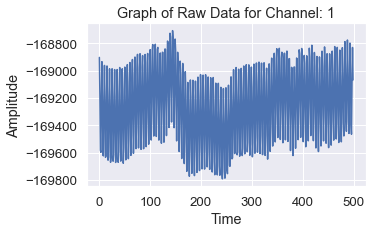

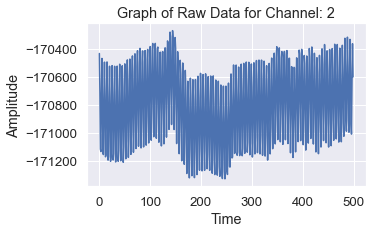

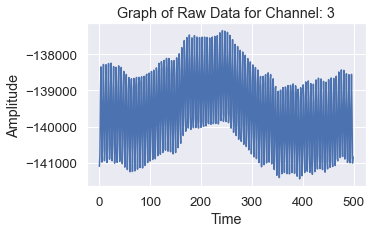

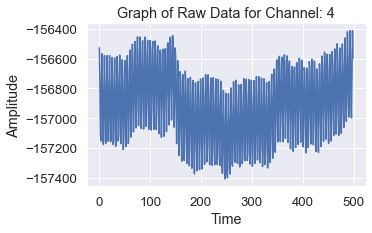

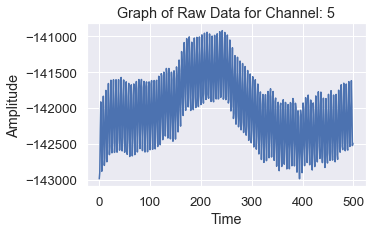

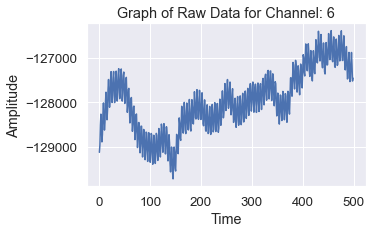

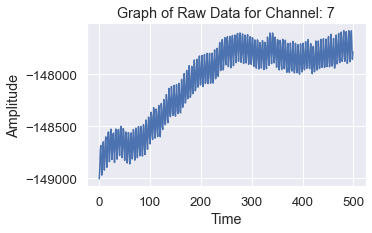

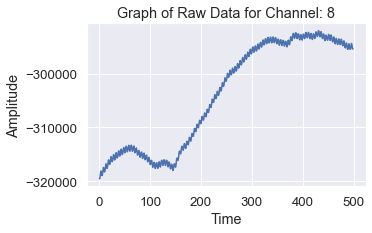

In [ ]:
for i in range(8):
    plot_raw(sub_1_eeg_data_1, i)

In [ ]:
from scipy import signal

# Define window length (4 seconds)
sf = 256
win = 4 * sf

def plot_psd(data, i):
    freqs, psd = signal.welch(data[:, i], sf, nperseg=win)
    # Plot the power spectrum
    sns.set(font_scale=1.2, style='white')
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, psd, color='k', lw=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (V^2 / Hz)')
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Welch's periodogram")
    plt.xlim([0, freqs.max()])
    sns.despine()

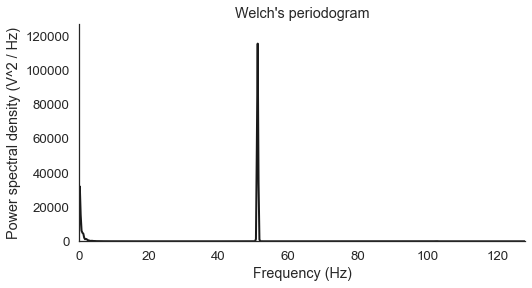

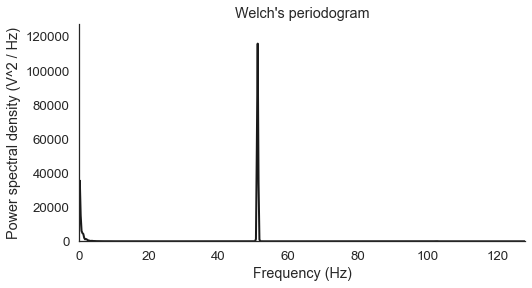

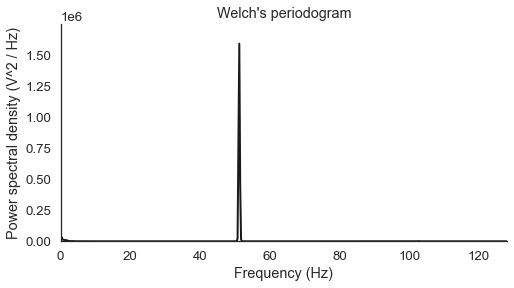

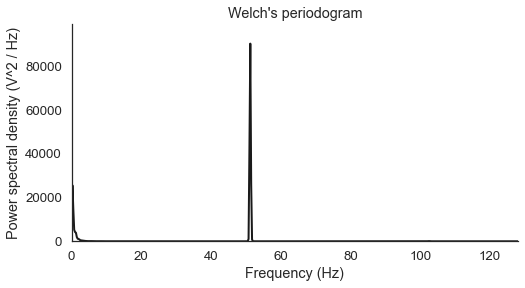

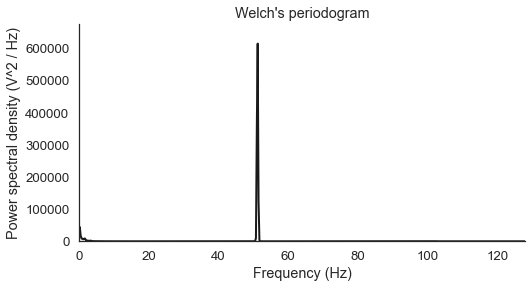

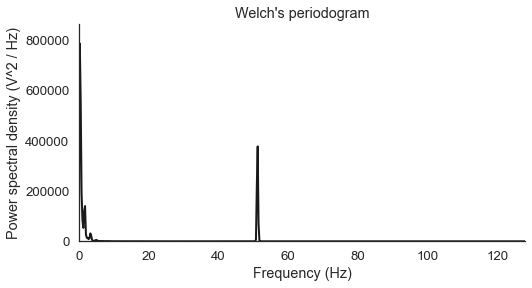

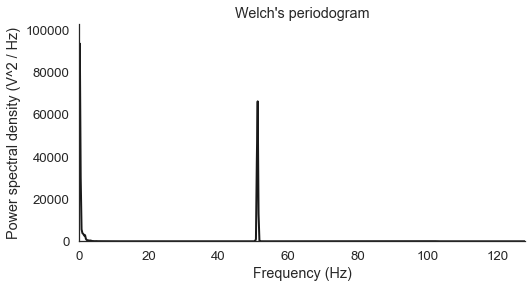

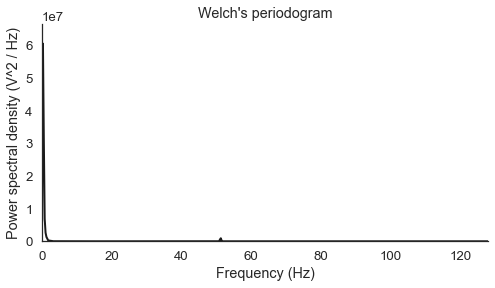

In [ ]:
for i in range(8):
    plot_psd(sub_1_eeg_data_1, i)

In [ ]:
# Scaling Data with the scale factor S = (4500000)/4/(2**23-1)

sub_1_scaled_data_1 = sub_1_eeg_data_1*S
sub_1_scaled_data_2 = sub_1_eeg_data_2*S
sub_1_scaled_data_3 = sub_1_eeg_data_3*S

sub_2_scaled_data_1 = sub_2_eeg_data_1*S
sub_2_scaled_data_2 = sub_2_eeg_data_2*S
sub_2_scaled_data_3 = sub_2_eeg_data_3*S

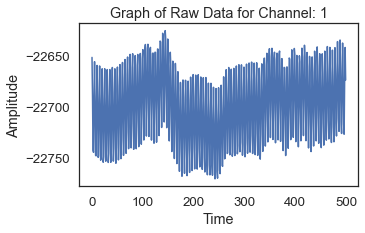

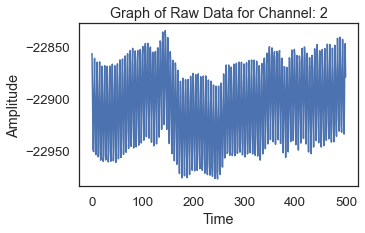

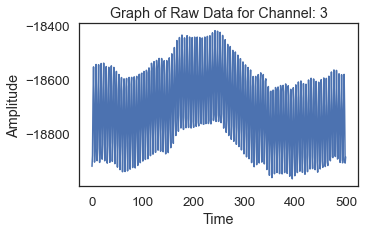

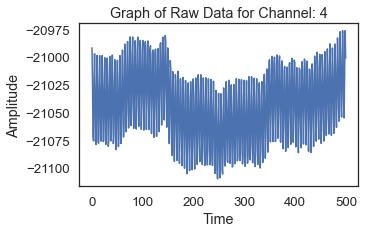

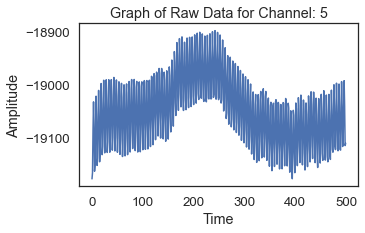

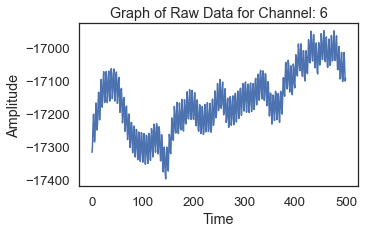

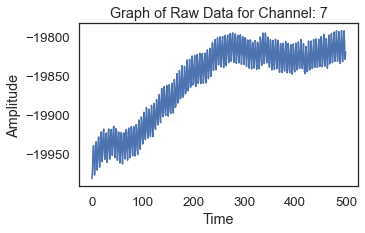

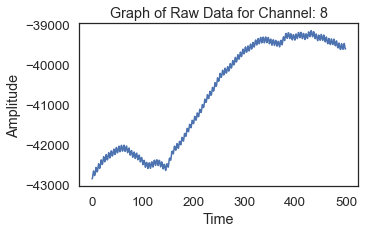

In [ ]:
for i in range(8):
    plot_raw(sub_1_scaled_data_1, i)

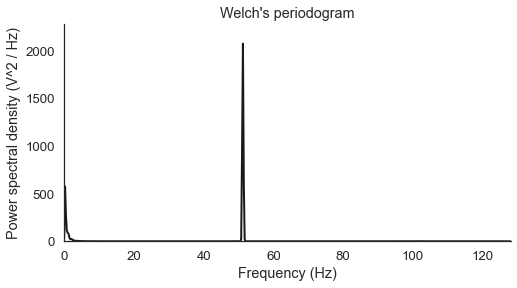

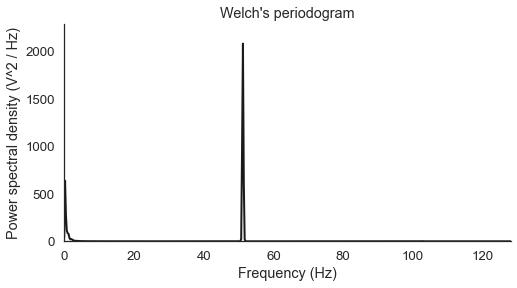

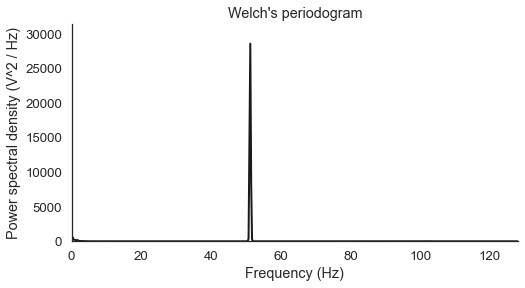

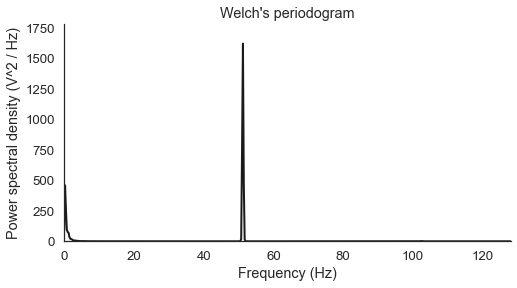

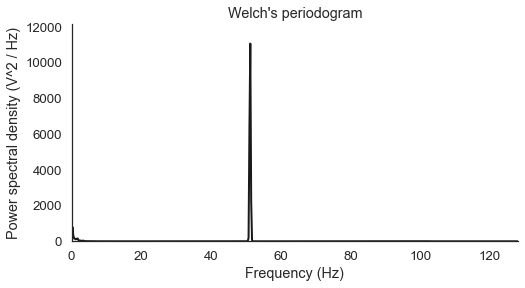

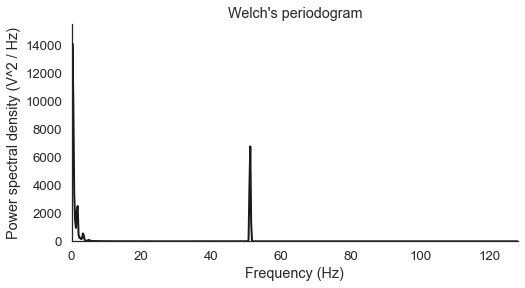

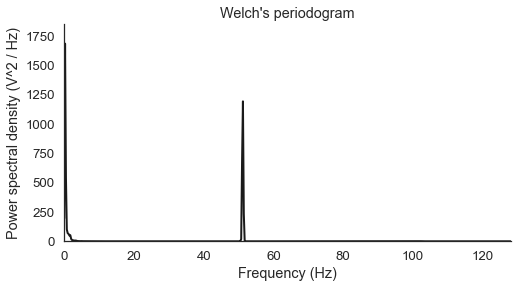

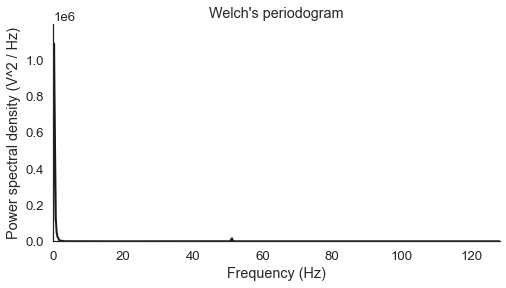

In [ ]:
for i in range(8):
    plot_psd(sub_1_scaled_data_1, i)

In [ ]:
# Notch filter

def notch_filter(data,samp_freq=256,notch_freq=50,quality_factor=20):
    b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
    freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
    outputSignal = signal.filtfilt(b_notch, a_notch, data)
    return outputSignal


def data_on_notch_filter(data):
    notched_data = np.zeros((8,data.shape[0]))

    for i,channel in enumerate(data.T):
        notched_data[i] = notch_filter(data.T[i],256,50,20)

    return notched_data.T

In [ ]:
# Applying notch filter

notched_sub_1_data_1 = data_on_notch_filter(sub_1_scaled_data_1)
notched_sub_1_data_2 = data_on_notch_filter(sub_1_scaled_data_2)
notched_sub_1_data_3 = data_on_notch_filter(sub_1_scaled_data_3)
notched_sub_2_data_1 = data_on_notch_filter(sub_2_scaled_data_1)
notched_sub_2_data_2 = data_on_notch_filter(sub_2_scaled_data_2)
notched_sub_2_data_3 = data_on_notch_filter(sub_2_scaled_data_3)

print(notched_sub_1_data_1.shape)
print(notched_sub_1_data_2.shape)
print(notched_sub_1_data_3.shape)
print('------------------')
print(notched_sub_2_data_1.shape)
print(notched_sub_2_data_2.shape)
print(notched_sub_2_data_3.shape)

(108582, 8)
(107956, 8)
(94452, 8)
------------------
(99196, 8)
(114782, 8)
(95558, 8)


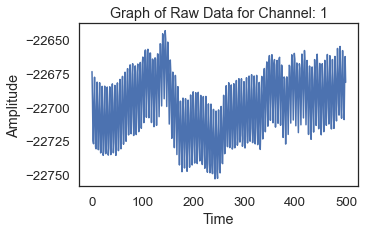

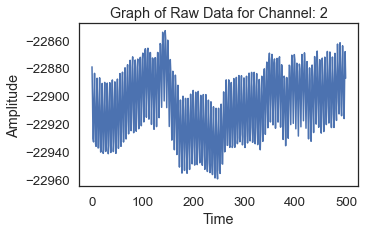

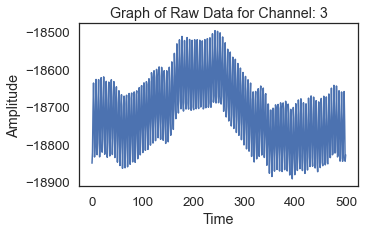

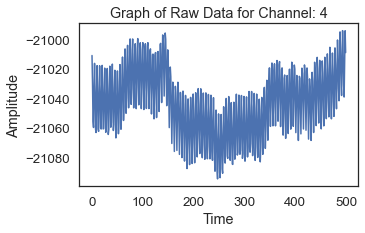

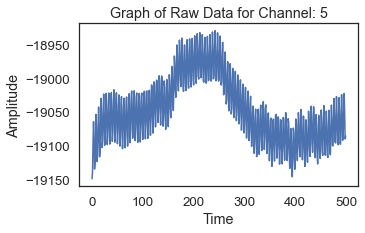

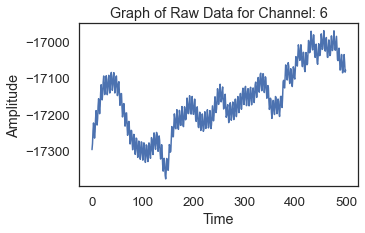

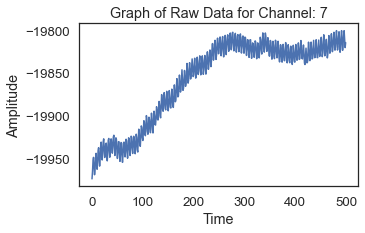

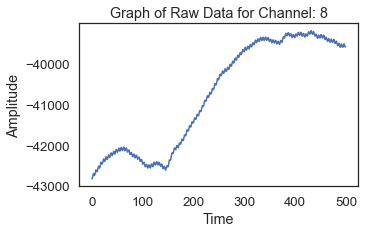

In [ ]:
for i in range(8):
    plot_raw(notched_sub_1_data_1, i)

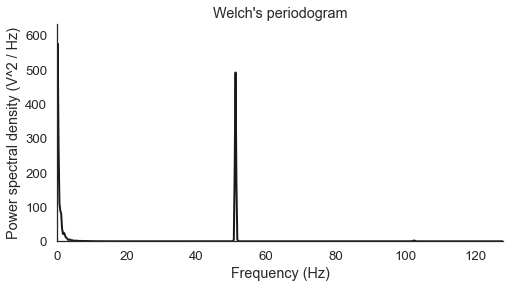

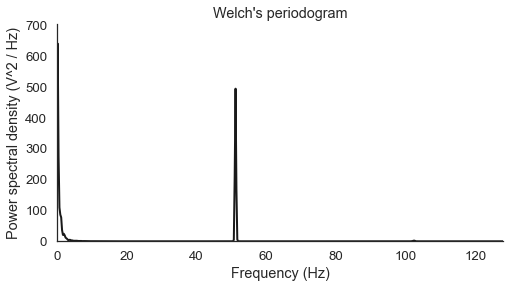

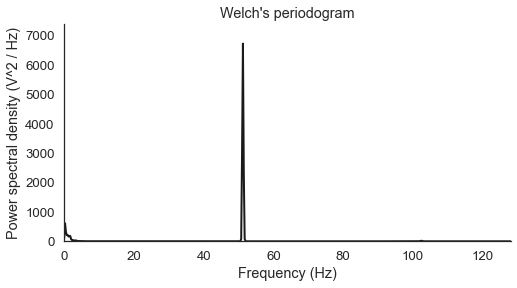

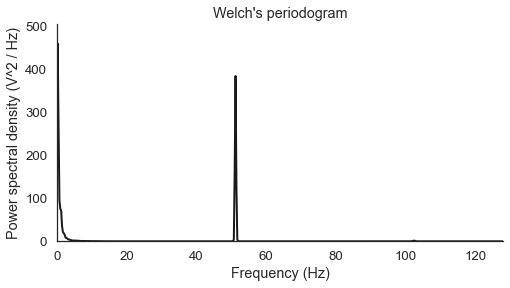

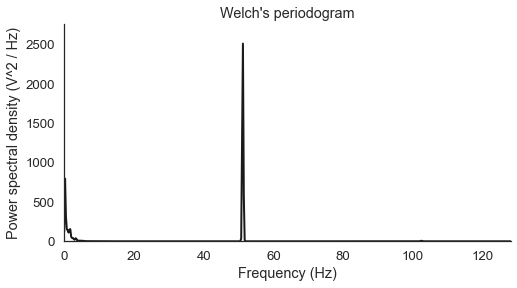

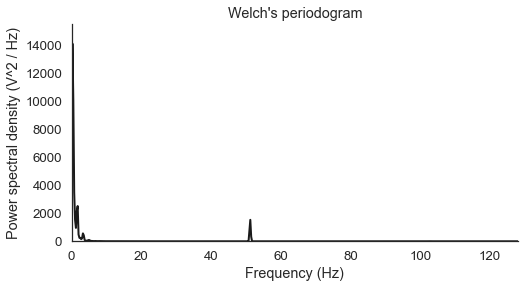

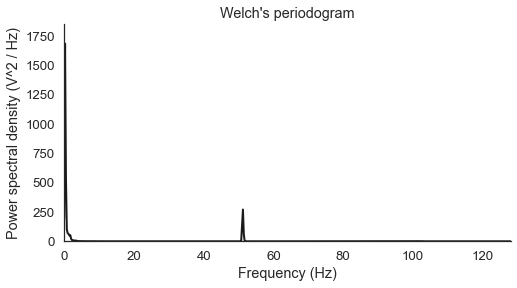

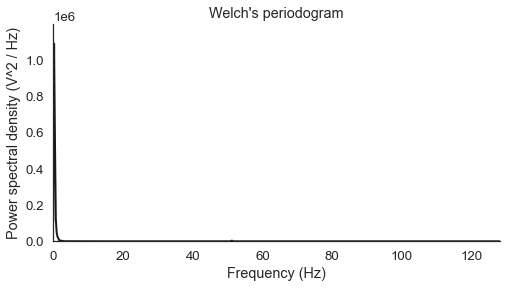

In [ ]:
for i in range(8):
    plot_psd(notched_sub_1_data_1, i)

In [ ]:
# Bandpass filter

from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

def data_on_bandpass_filter(data):   
    data_preprocessed_1 = np.zeros((8,data.shape[0]))
    for i,channel in enumerate(data.T):
        data_preprocessed_1[i] = butter_bandpass_filter(data.T[i], 0.5,40,256, order=6)

    return data_preprocessed_1.T

In [ ]:
# Applying bandpass filter

band_sub_1_data_1 = data_on_notch_filter(notched_sub_1_data_1)
band_sub_1_data_2 = data_on_notch_filter(notched_sub_1_data_2)
band_sub_1_data_3 = data_on_notch_filter(notched_sub_1_data_3)
band_sub_2_data_1 = data_on_notch_filter(notched_sub_2_data_1)
band_sub_2_data_2 = data_on_notch_filter(notched_sub_2_data_2)
band_sub_2_data_3 = data_on_notch_filter(notched_sub_2_data_3)

print(band_sub_1_data_1.shape)
print(band_sub_1_data_2.shape)
print(band_sub_1_data_3.shape)
print('------------------')
print(band_sub_2_data_1.shape)
print(band_sub_2_data_2.shape)
print(band_sub_2_data_3.shape)

(108582, 8)
(107956, 8)
(94452, 8)
------------------
(99196, 8)
(114782, 8)
(95558, 8)


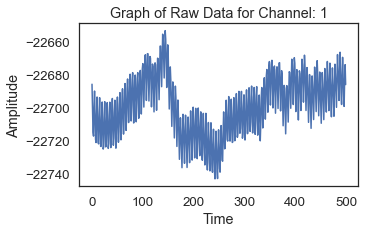

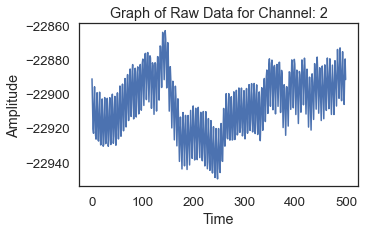

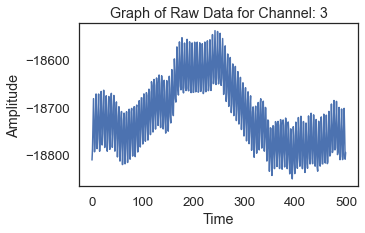

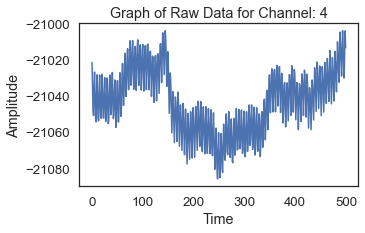

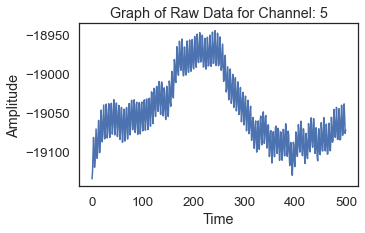

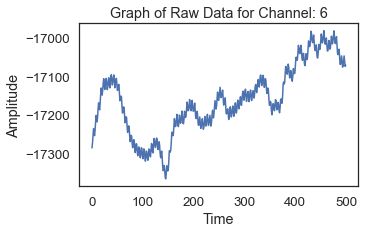

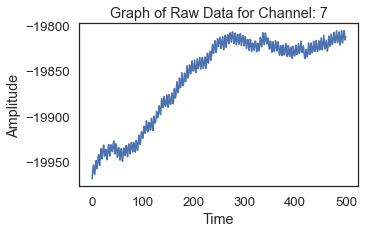

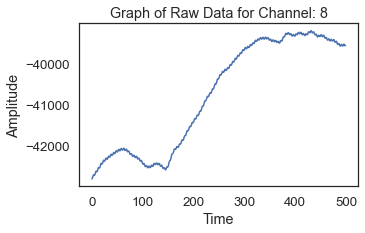

In [ ]:
for i in range(8):
    plot_raw(band_sub_1_data_1, i)

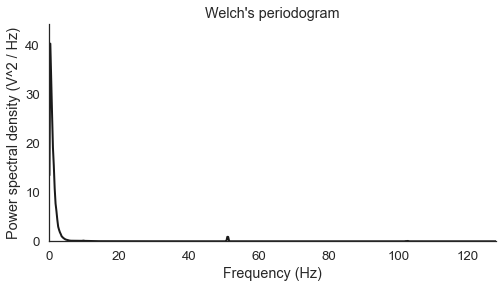

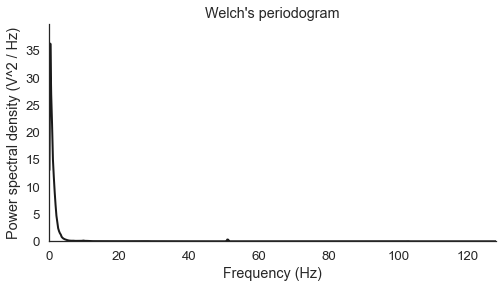

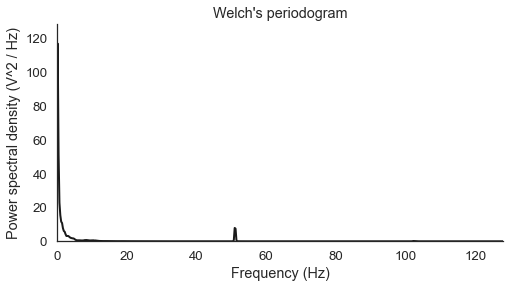

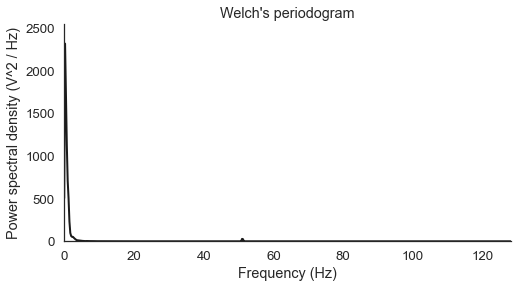

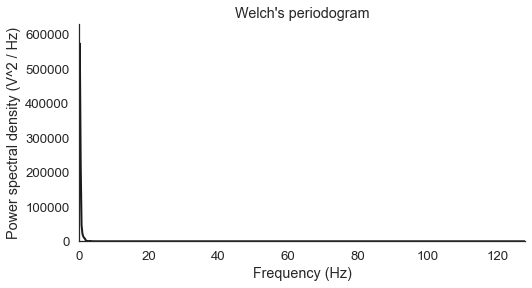

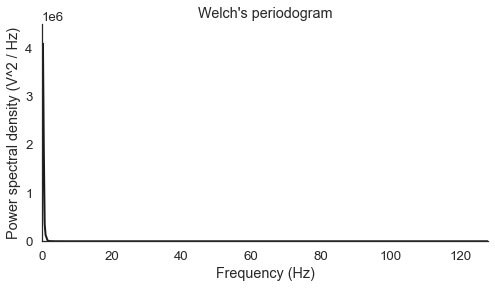

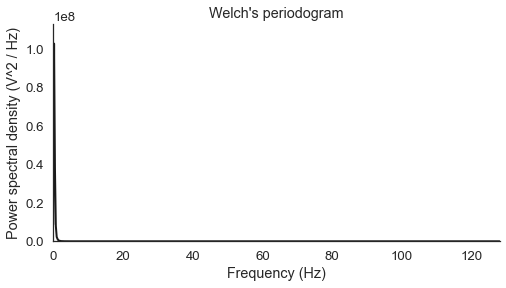

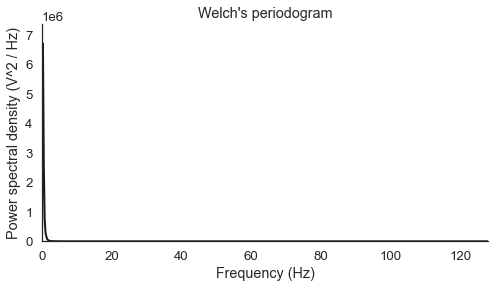

In [ ]:
for i in range(8):
    plot_psd(band_sub_2_data_3, i)

(array([20.40518465, 40.76918045, 40.64595221, 40.4416953 , 40.15808068,
        39.79741944, 39.362635  , 38.8572281 , 38.2852351 , 37.65118012,
        36.9600219 , 36.21709592, 35.42805273, 34.5987935 , 33.73540345,
        32.84408424, 31.93108639, 31.0026423 , 30.06490119, 29.1238665 ,
        28.18533673, 27.25485041, 26.33763586, 25.43856635, 24.56212111,
        23.7123526 , 22.89286029, 22.10677119, 21.35672713, 20.64487876,
        19.97288615, 19.34192574, 18.75270331, 18.20547254, 17.70005868,
        17.23588674, 16.81201367, 16.42716378, 16.0797668 , 15.76799781,
        15.48981847, 15.24301865, 15.02525797, 14.83410657, 14.66708447,
        14.52169891, 14.3954794 , 14.28600978, 14.19095716, 14.10809729,
        14.03533628, 13.97072847, 13.91249039, 13.85901087, 13.80885738,
        13.76077874, 13.7137044 , 13.6667406 , 13.61916365, 13.5704108 ,
        13.52006888, 13.46786135, 13.41363394, 13.35733938, 13.29902168,
        13.23880017, 13.17685391, 13.11340649, 13.0

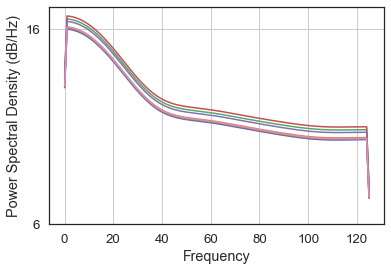

In [ ]:
#plt.psd(notched_sub_1_data_1[0], Fs=250)
plt.psd(notched_sub_1_data_1[1], Fs=250)
plt.psd(notched_sub_1_data_1[2], Fs=250)
plt.psd(notched_sub_1_data_1[3], Fs=250)
plt.psd(notched_sub_1_data_1[4], Fs=250)
plt.psd(notched_sub_1_data_1[5], Fs=250)
plt.psd(notched_sub_1_data_1[6], Fs=250)
plt.psd(notched_sub_1_data_1[7], Fs=250)

(array([19.79547505, 39.55098767, 39.43142858, 39.23325352, 38.95808377,
        38.6081617 , 38.18632381, 37.69596675, 37.14100685, 36.52583374,
        35.85525868, 35.1344585 , 34.36891574, 33.56435608, 32.72668376,
        31.86191602, 30.97611747, 30.07533516, 29.16553539, 28.25254301,
        27.34198403, 26.43923218, 25.54936021, 24.67709636, 23.82678651,
        23.00236247, 22.2073165 , 21.44468244, 20.71702337, 20.02642574,
        19.37450006, 18.76238752, 18.19077267, 17.65990139, 17.16960383,
        16.71932185, 16.30814015, 15.93482069, 15.59783962, 15.29542602,
        15.02560188, 14.78622253, 14.57501695, 14.38962731, 14.22764714,
        14.08665763, 13.96426157, 13.85811451, 13.76595279, 13.68561822,
        13.61507912, 13.55244762, 13.49599329, 13.4441529 , 13.39553657,
        13.3489304 , 13.3032958 , 13.25776569, 13.2116381 , 13.16436717,
        13.11555223, 13.06492519, 13.01233659, 12.95774082, 12.90118081,
        12.84277263, 12.78269024, 12.72115084, 12.6

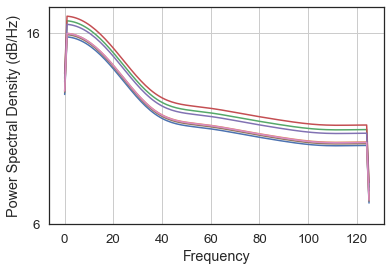

In [ ]:
#plt.psd(band_sub_1_data_1[0], Fs=250)
plt.psd(band_sub_1_data_1[1], Fs=250)
plt.psd(band_sub_1_data_1[2], Fs=250)
plt.psd(band_sub_1_data_1[3], Fs=250)
plt.psd(band_sub_1_data_1[4], Fs=250)
plt.psd(band_sub_1_data_1[5], Fs=250)
plt.psd(band_sub_1_data_1[6], Fs=250)
plt.psd(band_sub_1_data_1[7], Fs=250)

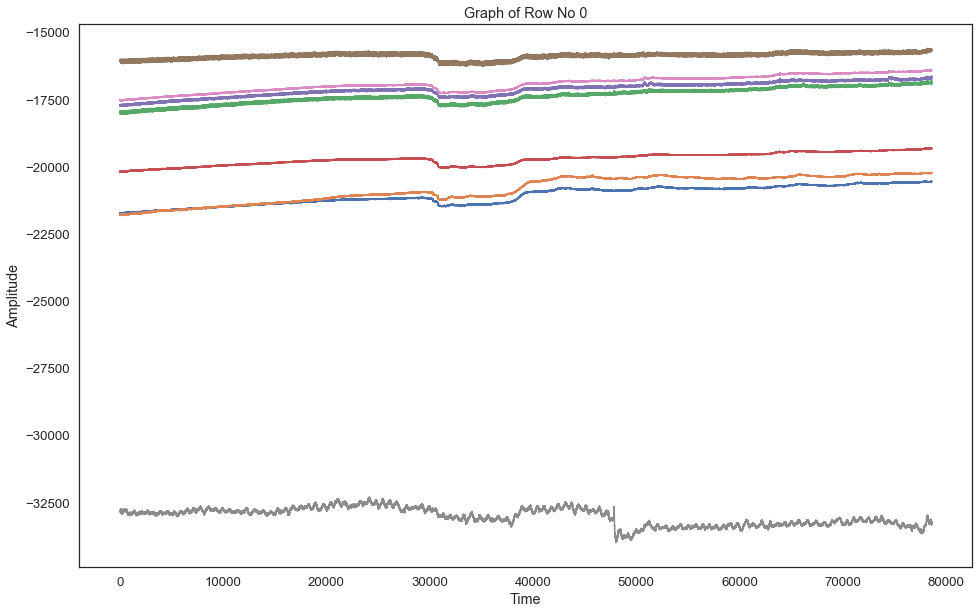

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(band_sub_1_data_1[30000:, :])
plt.title('Graph of Row No 0')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
def find_closest(arr, val):
    idx = np.abs(arr - val).argmin()
    return (arr[idx] , idx)

#closest stamps for our dataset
def closest_stamp_values(time_stamps, events):
    closest_stamps_vals = np.zeros(len(events))
    closest_stamps_ids = np.zeros(len(events)) 
    
    event_labels = []
    
    for i in range(len(events)):
        closest_stamps_vals[i] = find_closest(time_stamps, events[i,0])[0]
        closest_stamps_ids[i] = find_closest(time_stamps, events[i,0])[1]
        event_labels.append(events[i,1])
    
    return closest_stamps_vals, closest_stamps_ids, event_labels

def remove_fixation_and_baseline(closest_stamps_ids, event_labels, data):
    red_data = np.zeros((125,250,8))
    white_data = np.zeros((125,250,8))
    markers = []
    rrc = 0   #red row count
    wrc = 0   #white row count
    for i,image in enumerate(closest_stamps_ids):
        if event_labels[i] == 'red':
            for j in range(5):
                for k in range(8):
                    red_data[k][rrc] = data[k][int(closest_stamps_ids[i]+j*256):int(closest_stamps_ids[i])+j*256+250]            
                rrc = rrc + 1   


        if event_labels[i] == 'white':
            for j in range(5):
                for k in range(8):
                    white_data[k][wrc] = data[k][int(closest_stamps_ids[i]+j*256):int(closest_stamps_ids[i])+j*256+250]            
                wrc = wrc + 1

    rrc=0
    wrc=0
    return markers, red_data, white_data

In [ ]:
# Data Epoching

def segmentation(time_stamp, events, data):
    closest_stamps_vals = np.zeros(len(events))
    closest_stamps_ids = np.zeros(len(events))

    event_labels = []

    closest_stamps_vals, closest_stamps_ids, event_labels = closest_stamp_values(time_stamp, events)

    markers, red_data, white_data = remove_fixation_and_baseline(closest_stamps_ids,event_labels, data)
    markers = np.array(markers)
    print()
    
    return red_data, white_data, markers

In [ ]:
# Epoching Data for 2 subjects

# Subject 1
red_sub_1_data_1, white_sub_1_data_1, markers_sub_1_data_1 = segmentation(sub_1_time_stamp_1, sub_1_events_1, band_sub_1_data_1)
red_sub_1_data_2, white_sub_1_data_2, markers_sub_1_data_2 = segmentation(sub_1_time_stamp_2, sub_1_events_2, band_sub_1_data_2)
red_sub_1_data_3, white_sub_1_data_3, markers_sub_1_data_3 = segmentation(sub_1_time_stamp_3, sub_1_events_3, band_sub_1_data_3)

# Subject 2
red_sub_2_data_1, white_sub_2_data_1, markers_sub_2_data_1 = segmentation(sub_2_time_stamp_1, sub_2_events_1, band_sub_2_data_1)
red_sub_2_data_2, white_sub_2_data_2, markers_sub_2_data_2 = segmentation(sub_2_time_stamp_2, sub_2_events_2, band_sub_2_data_2)
red_sub_2_data_3, white_sub_2_data_3, markers_sub_2_data_3 = segmentation(sub_2_time_stamp_3, sub_2_events_3, band_sub_2_data_3)

# printing Data Shapes
print(red_sub_1_data_1.shape)
print(white_sub_1_data_1.shape)
print(markers_sub_1_data_1.shape)
print('----------------')
print(red_sub_2_data_1.shape)
print(white_sub_2_data_1.shape)
print(markers_sub_2_data_1.shape)

ValueError: could not broadcast input array from shape (0,) into shape (8,)

In [ ]:
# Concatenate 3 trials data for each subjects

# Subject 1
sub_1_data = np.concatenate((epoched_sub_1_data_1, epoched_sub_1_data_2, epoched_sub_1_data_3), axis=0)
sub_1_markers = np.concatenate((markers_sub_1_data_1, markers_sub_1_data_2, markers_sub_1_data_3), axis=0)

# Subject 2
sub_2_data = np.concatenate((epoched_sub_2_data_1, epoched_sub_2_data_2, epoched_sub_2_data_3), axis=0)
sub_2_markers = np.concatenate((markers_sub_2_data_1, markers_sub_2_data_2, markers_sub_2_data_3), axis=0)

# Printing Data Shapes
print(sub_1_data.shape)
print(sub_1_markers.shape)
print('--------------')
print(sub_2_data.shape)
print(sub_2_markers.shape)

(750, 250, 8)
(750,)
--------------
(750, 250, 8)
(750,)


In [ ]:
from scipy.stats import kurtosis, skew

def stat_feature(segment):
    _mean = []
    _std = []
    _skewness = []
    _kurtosis = []

    for i in range(len(segment)):
        _mean.append(np.mean(segment[i]))
        _std.append(np.std(segment[i]))
        _skewness.append(skew(segment[i]))
        _kurtosis.append(kurtosis(segment[i]))

    _mean = np.array(_mean)
    _std = np.array(_std)
    _skewness = np.array(_skewness)
    _kurtosis = np.array(_kurtosis)

    features = np.concatenate((_mean, _std, _skewness, _kurtosis))

    return features

In [ ]:
from scipy.fftpack import dct

def dct_feature(segment):
    features = []
    for i in range(len(segment)):
        dct_coef = dct(segment[i,:], 2, norm='ortho')
        power = sum( j*j for j in dct_coef)
        features.append(power)

    features = np.array(features)
    return features

In [ ]:
from pywt import dwt

def wavelet_features(segment):
    cA_values = []
    cD_values = []
    cA_mean = []
    cA_std = []
    cA_Energy =[]
    cD_mean = []
    cD_std = []
    cD_Energy = []
    Entropy_D = []
    Entropy_A = []
    features = []
    for i in range(len(segment)):
        cA, cD = dwt(segment[i,:],'coif1')
        cA_values.append(cA)
        cD_values.append(cD)		#calculating the coefficients of wavelet transform.
    for x in range(len(segment)):   
        cA_Energy.append(abs(np.sum(np.square(cA_values[x]))))
        features.append(abs(np.sum(np.square(cA_values[x]))))
        
    for x in range(len(segment)):      
        cD_Energy.append(abs(np.sum(np.square(cD_values[x]))))
        features.append(abs(np.sum(np.square(cD_values[x]))))
        
    features = np.array(features)
        
    return features

In [ ]:
from scipy.signal import welch

def bandpowers(segment):
    features = []
    for i in range(len(segment)):
        f,Psd = welch(segment[i,:], 100, nperseg=250)
        power1 = 0
        power2 = 0
        power3 = 0
        power4 = 0
        power5 = 0
        for j in range(0,len(f)):
            if(f[j]>= 0.5 and f[j]<=4):
                power1 += Psd[j]
            if(f[j]>4 and f[j]<=8):
                power2 += Psd[j]
            if(f[j]>8 and f[j]<=12):
                power3 += Psd[j]
            if(f[j]>12 and f[j]<=30):
                power4 += Psd[j]
            if(f[j]>30):
                power5 += Psd[j]
        features.append(power1)
        features.append(power2)
        features.append(power3)
        features.append(power4)
        features.append(power5)
    return features

In [ ]:
# Extracting Features for Subjet 1


_statistics = []
_dct = []
_wavelet = []
_bandpower = []
for i in range(len(sub_1_data)):
    segment = sub_1_data[i]
    segment = np.array(segment)
    segment = np.transpose(segment)
    
    features1 = stat_feature(segment)
    features2 = dct_feature(segment)
    features3 = wavelet_features(segment)
    features4 = bandpowers(segment)
    
    _statistics.append(features1)
    _dct.append(features2)
    _wavelet.append(features3)
    _bandpower.append(features4)
    
sub_1_statistics = np.array(_statistics)
sub_1_dct = np.array(_dct)
sub_1_wavelet = np.array(_wavelet)
sub_1_bandpower = np.array(_bandpower)

print(sub_1_statistics.shape)
print(sub_1_dct.shape)
print(sub_1_wavelet.shape)
print(sub_1_bandpower.shape)

(750, 32)
(750, 8)
(750, 16)
(750, 40)


In [ ]:
# Extracting Features for Subjet 2


_statistics = []
_dct = []
_wavelet = []
_bandpower = []
for i in range(len(sub_1_data)):
    segment = sub_1_data[i]
    segment = np.array(segment)
    segment = np.transpose(segment)
    
    features1 = stat_feature(segment)
    features2 = dct_feature(segment)
    features3 = wavelet_features(segment)
    features4 = bandpowers(segment)
    
    _statistics.append(features1)
    _dct.append(features2)
    _wavelet.append(features3)
    _bandpower.append(features4)
    
sub_2_statistics = np.array(_statistics)
sub_2_dct = np.array(_dct)
sub_2_wavelet = np.array(_wavelet)
sub_2_bandpower = np.array(_bandpower)

print(sub_2_statistics.shape)
print(sub_2_dct.shape)
print(sub_2_wavelet.shape)
print(sub_2_bandpower.shape)

(750, 32)
(750, 8)
(750, 16)
(750, 40)


In [ ]:
sub_1_features = np.concatenate((sub_1_statistics, sub_1_dct, sub_1_wavelet, sub_1_bandpower), axis=1)
print(sub_1_features.shape)

sub_2_features = np.concatenate((sub_2_statistics, sub_2_dct, sub_2_wavelet, sub_2_bandpower), axis=1)
print(sub_2_features.shape)

(750, 96)
(750, 96)


In [ ]:
# Training and Testing Models

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


def train_test(features, markers):
    X_train, X_test, y_train, y_test = train_test_split(features, markers, test_size=0.3, random_state=42)

    # SVM
    svm_clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))
    svm_clf.fit(X_train, y_train)

    y_pred = svm_clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('Linear SVM Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")

    # SVM
    svm2_clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))
    svm2_clf.fit(X_train, y_train)

    y_pred = svm2_clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('RBF SVM Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")

    # RF
    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_train, y_train)

    y_pred = rf_clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('RF Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # LDA
    lda_clf = LinearDiscriminantAnalysis()
    lda_clf.fit(X_train, y_train)

    y_pred = lda_clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('LDA Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # DT
    dt_clf = DecisionTreeClassifier()
    dt_clf = dt_clf.fit(X_train, y_train)

    y_pred = dt_clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('DT Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # NB
    nb = GaussianNB()
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('NB Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # KNN
    knn_clf = KNeighborsClassifier()
    knn_clf = knn_clf.fit(X_train, y_train)

    y_pred = knn_clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('KNN Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # AdaBoost
    adb_clf = AdaBoostClassifier()
    adb_clf = adb_clf.fit(X_train, y_train)

    y_pred = adb_clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('AdaBoost Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")

In [ ]:
# For Subject 1
train_test(sub_1_dct, sub_1_markers)

[[54 57]
 [55 59]]
Linear SVM Accuracy: 50.22222222222222%

Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       111
           1       0.51      0.52      0.51       114

    accuracy                           0.50       225
   macro avg       0.50      0.50      0.50       225
weighted avg       0.50      0.50      0.50       225

[[42 69]
 [61 53]]
RBF SVM Accuracy: 42.22222222222222%

Classification Report : 
              precision    recall  f1-score   support

           0       0.41      0.38      0.39       111
           1       0.43      0.46      0.45       114

    accuracy                           0.42       225
   macro avg       0.42      0.42      0.42       225
weighted avg       0.42      0.42      0.42       225

[[105   6]
 [ 23  91]]
RF Accuracy: 87.1111111111111%

Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.95      0.88 

In [ ]:
# For Subject 2
train_test(sub_2_dct, sub_2_markers)

[[54 57]
 [55 59]]
Linear SVM Accuracy: 50.22222222222222%

Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       111
           1       0.51      0.52      0.51       114

    accuracy                           0.50       225
   macro avg       0.50      0.50      0.50       225
weighted avg       0.50      0.50      0.50       225

[[42 69]
 [61 53]]
RBF SVM Accuracy: 42.22222222222222%

Classification Report : 
              precision    recall  f1-score   support

           0       0.41      0.38      0.39       111
           1       0.43      0.46      0.45       114

    accuracy                           0.42       225
   macro avg       0.42      0.42      0.42       225
weighted avg       0.42      0.42      0.42       225

[[107   4]
 [ 17  97]]
RF Accuracy: 90.66666666666666%

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91